In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/

fatal: destination path 'master' already exists and is not an empty directory.


In [2]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import pickle 

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls master

signnames.csv  test.p  train.p	valid.p


In [4]:
df = pd.read_csv("master/signnames.csv")
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [5]:
with open("master/test.p","rb") as f:
    test_data = pickle.load(f)

with open("master/train.p","rb") as f:
    train_data = pickle.load(f)

with open("master/valid.p","rb") as f:
    val_data = pickle.load(f)

f.closed

True

In [6]:
print(type(test_data))
print(type(train_data))
print(type(val_data))

<class 'dict'>
<class 'dict'>
<class 'dict'>


In [7]:
test_data.keys(),train_data.keys(),val_data.keys()

(dict_keys(['sizes', 'coords', 'features', 'labels']),
 dict_keys(['coords', 'labels', 'features', 'sizes']),
 dict_keys(['coords', 'labels', 'features', 'sizes']))

In [8]:
X_train , y_train = train_data["features"],train_data["labels"]
X_test , y_test = test_data["features"],test_data["labels"]
X_val , y_val = val_data["features"],val_data["labels"]

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((34799, 32, 32, 3),
 (34799,),
 (12630, 32, 32, 3),
 (12630,),
 (4410, 32, 32, 3),
 (4410,))

In [10]:
assert(X_train.shape[0] == y_train.shape[0]), "The Number of Images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The Number of Images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The Number of Images is not equal to the number of labels"

assert(X_train.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"
assert(X_val.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"
assert(X_test.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"

In [11]:
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [12]:
df["ClassId"].nunique(),df["SignName"].nunique()

(43, 43)

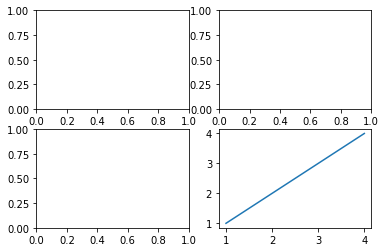

In [13]:
fig, axes = plt.subplots(2,2)

# ilk olan rows, ikinci olan cols !!! 
# Sadece tekrar için gösterdim !!

axes[1][1].plot(np.array([1,2,3,4]), np.array([1,2,3,4]))
plt.show()

In [14]:
for i,j in enumerate(df.iterrows()):

    if i == 0:

        print(j[0])
        print()
        print(j[1][0])
        print()
        print(j[1][1])
        print()
        print(j)
        
        break

0

0

Speed limit (20km/h)

(0, ClassId                        0
SignName    Speed limit (20km/h)
Name: 0, dtype: object)


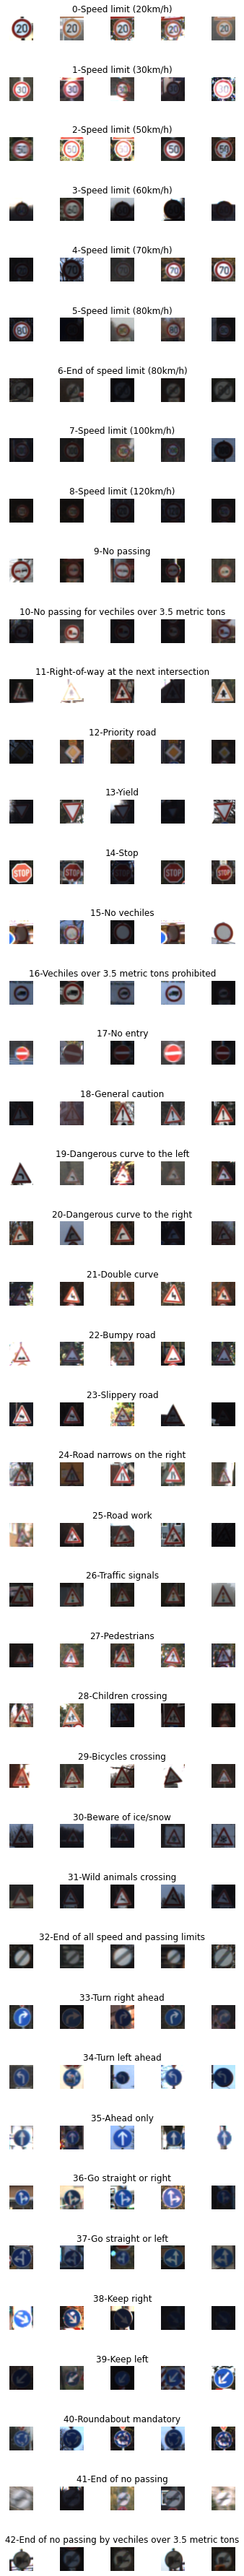

In [15]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axes = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,50))
fig.tight_layout()

for i in range(cols):

    for j,rows in df.iterrows():

        x_selected = X_train[y_train == j]
        random = np.random.randint(0 , len(x_selected) - 1) 

        axes[j][i].imshow(x_selected[random,:,:], cmap = plt.get_cmap("gray"))
        axes[j][i].axis("off")

        if i == 2:

            axes[j][i].set_title(str(j) + "-" + rows["SignName"])
            num_of_samples.append(len(x_selected))

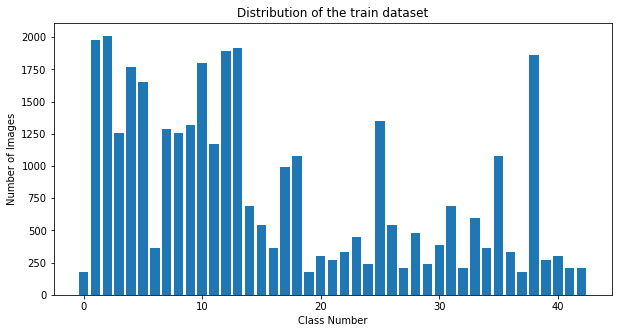

In [18]:
plt.figure(figsize = (10,5))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

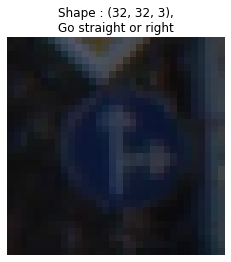

In [19]:
i = 1000
name = df[df["ClassId"] == y_train[i]]["SignName"].values[0]
plt.imshow(X_train[i])
plt.title(f"Shape : {X_train[i].shape},\n{name}")
plt.axis("off")
plt.show()

In [20]:
def grayscale(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return gray

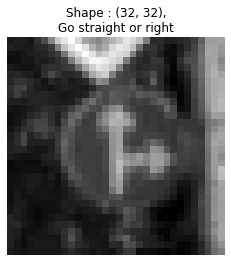

In [21]:
i = 1000
gray = grayscale(X_train[i])
name = df[df["ClassId"] == y_train[i]]["SignName"].values[0]

plt.imshow(gray,cmap = "gray")
plt.title(f"Shape : {gray.shape},\n{name}")
plt.axis("off")
plt.show()

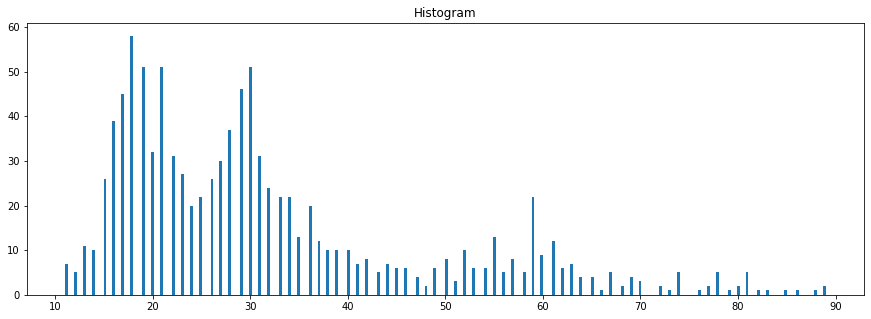

In [22]:
plt.figure(figsize = (15,5))
plt.hist(gray.ravel(),bins = 256)
plt.title("Histogram")
plt.show()

In [23]:
def equalize(image):
    image= cv2.equalizeHist(image)
    return image

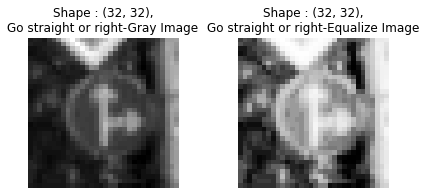

In [24]:
img_equ = equalize(gray)

plt.subplot(121)
plt.imshow(gray,cmap = "gray")
plt.title(f"Shape : {gray.shape},\n{name}-Gray Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_equ,cmap = "gray")
plt.title(f"Shape : {img_equ.shape},\n{name}-Equalize Image")
plt.axis("off")

plt.tight_layout()
plt.show()

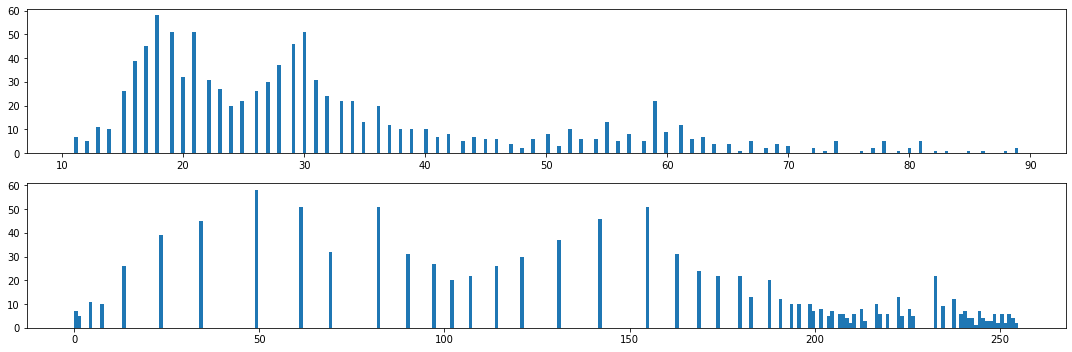

In [25]:
plt.figure(figsize = (15,5))

plt.subplot(211)
plt.hist(gray.ravel(), bins = 256)

plt.subplot(212)
plt.hist(img_equ.ravel(), bins = 256)

plt.tight_layout()
plt.show()

In [26]:
def preprocessing(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = image / 255

    return image

In [27]:
# Example
def square(a):
    return a**2

list(map(lambda x : x*x,[1,2,3,4])),list(map(square,[2,3,4]))

([1, 4, 9, 16], [4, 9, 16])

In [28]:
X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))

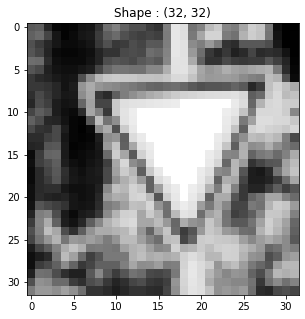

In [29]:
random = np.random.randint(0, len(X_train) - 1)

plt.figure(figsize = (7,5))
plt.imshow(X_train[random],cmap = "gray")
plt.title(f"Shape : {X_train[random].shape}")
plt.show()

In [30]:
X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32), (4410, 32, 32), (12630, 32, 32))

In [31]:
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) ) 
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) ) 
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1) ) 

X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [32]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

In [33]:
def leNet_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 15, kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [34]:
model = leNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dense (Dense)               (None, 500)               2

In [35]:
h = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val,y_val),batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
87/87 [==============================] - 5s 20ms/step - loss: 1.8810 - accuracy: 0.4699 - val_loss: 0.7747 - val_accuracy: 0.7612
Epoch 2/10
87/87 [==============================] - 1s 15ms/step - loss: 0.5754 - accuracy: 0.8136 - val_loss: 0.4103 - val_accuracy: 0.8705
Epoch 3/10
87/87 [==============================] - 1s 15ms/step - loss: 0.3467 - accuracy: 0.8908 - val_loss: 0.3496 - val_accuracy: 0.9007
Epoch 4/10
87/87 [==============================] - 1s 16ms/step - loss: 0.2702 - accuracy: 0.9148 - val_loss: 0.3543 - val_accuracy: 0.8941
Epoch 5/10
87/87 [==============================] - 1s 15ms/step - loss: 0.2369 - accuracy: 0.9247 - val_loss: 0.2902 - val_accuracy: 0.9109
Epoch 6/10
87/87 [==============================] - 2s 19ms/step - loss: 0.1897 - accuracy: 0.9391 - val_loss: 0.2881 - val_accuracy: 0.9202
Epoch 7/10
87/87 [==============================] - 1s 17ms/step - loss: 0.1730 - accuracy: 0.9451 - val_loss: 0.3201 - val_accuracy: 0.9082
Epoch 8/10
87

In [36]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,5))

    plt.subplot(121)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Validation")
    plt.xticks(range(0,epochs+1,2))
    plt.title("Accuracy Score",fontsize = 15)
    plt.xlabel("Epochs ")
    plt.ylabel("Score")
    plt.legend(loc = "best")

    plt.subplot(122)
    plt.plot(history.history["loss"], label = "Train")
    plt.plot(history.history["val_loss"], label = "Validation")
    plt.xticks(range(0,epochs+1,2))
    plt.title("Loss Score",fontsize = 15)
    plt.xlabel("Epochs ")
    plt.ylabel("Score")
    plt.legend(loc = "best")

    plt.tight_layout()
    plt.show()

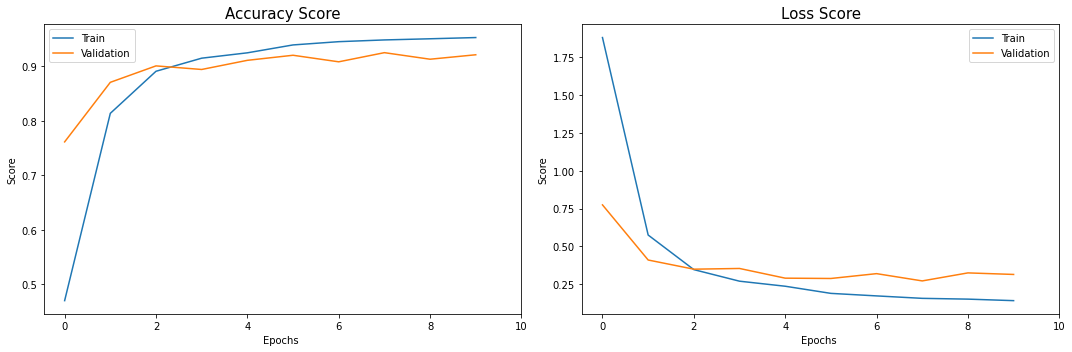

In [37]:
history_graph(h,10)

In [38]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.4038381278514862
Accuracy :  0.9080759882926941


--

In [39]:
def Rebuild_leNet_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [40]:
model = Rebuild_leNet_model()

In [41]:
h = model.fit(X_train, y_train, epochs = 10,validation_data = (X_val,y_val), batch_size = 400,verbose = 0, shuffle = 1)

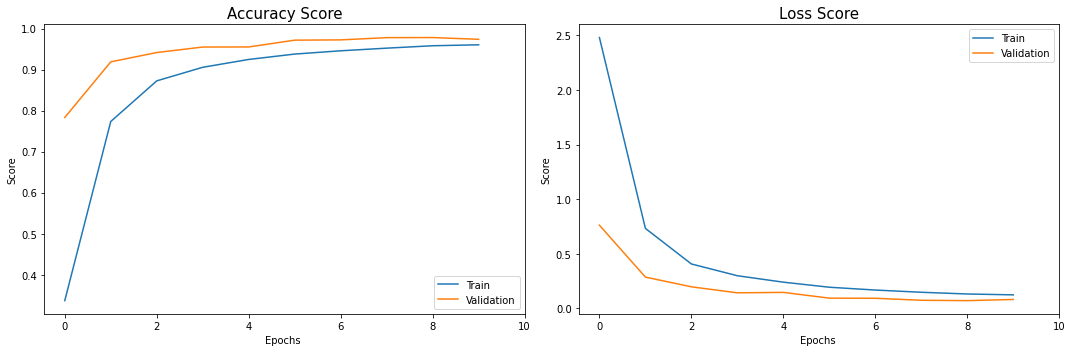

In [42]:
history_graph(h,10)

In [43]:
score = model.evaluate(X_test, y_test, verbose = 0)

#Loss :  0.4038381278514862
#Accuracy :  0.9080759882926941

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.16203969717025757
Accuracy :  0.9528107643127441


In [44]:
liste = ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg",
"https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg",
"https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg",
"https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg",
"https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg"
]

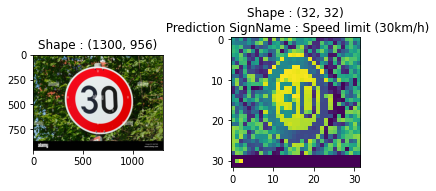

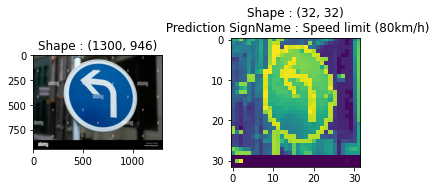

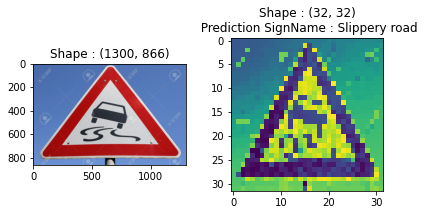

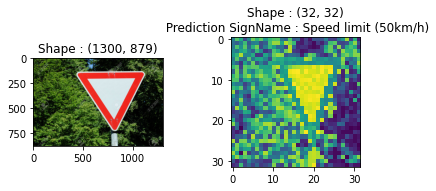

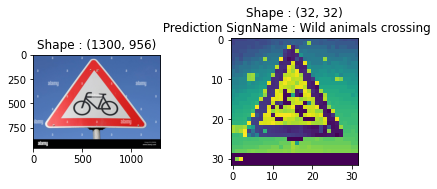

In [49]:
import requests
from PIL import Image

for url in liste:

    r = requests.get(url,stream = True)
    img = Image.open(r.raw)

    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Shape : {img.size}")

    img = np.asarray(img)
    img = cv2.resize(img, (32,32))
    img = preprocessing(img)

    plt.subplot(122)
    plt.imshow(img)

    pred = model.predict(img.reshape(1,32,32,1))
    pred = np.argmax(pred)
    name = df[df["ClassId"] == pred]["SignName"].values[0]

    plt.title(f"Shape : {img.shape}\n Prediction SignName : {name}")

    plt.tight_layout()
    plt.show()

--

In [50]:
X_train, y_train = train_data["features"], train_data["labels"]
X_val ,y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]

In [51]:
def preprocessing(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = image/255

    return image

In [52]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

In [53]:
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) ) 
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) ) 
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1) ) 

X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [54]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

In [55]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
                                                          height_shift_range = 0.1,
                                                          zoom_range = 0.2,
                                                          shear_range = 0.2,
                                                          rotation_range = 10)

In [57]:
datagen.fit(X_train)

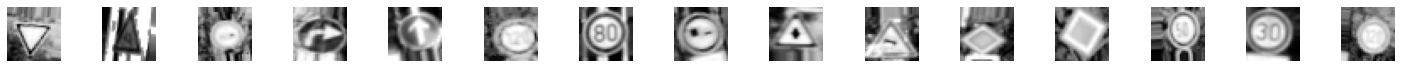

In [62]:
batches = datagen.flow(X_train, y_train , batch_size = 15)

X_batch, y_batch = next(batches)

fig, axes = plt.subplots(1,15,figsize = (20,5))
fig.tight_layout()

for i in range(15):

    axes[i].imshow(X_batch[i].reshape((32,32)), cmap = "gray")
    axes[i].axis("off")

plt.show()

In [64]:
model = Rebuild_leNet_model()

In [65]:
h = model.fit_generator(datagen.flow(X_train ,y_train, batch_size = 50), 
                        steps_per_epoch = X_train.shape[0] / 50, 
                        epochs = 10,
                        validation_data = (X_val,y_val),
                        shuffle = 1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
695/695 [==============================] - 27s 37ms/step - loss: 2.1090 - accuracy: 0.3984 - val_loss: 0.4758 - val_accuracy: 0.8821
Epoch 2/10
695/695 [==============================] - 20s 29ms/step - loss: 0.8800 - accuracy: 0.7240 - val_loss: 0.1938 - val_accuracy: 0.9447
Epoch 3/10
695/695 [==============================] - 20s 29ms/step - loss: 0.6031 - accuracy: 0.8108 - val_loss: 0.1345 - val_accuracy: 0.9658
Epoch 4/10
695/695 [==============================] - 21s 31ms/step - loss: 0.4710 - accuracy: 0.8527 - val_loss: 0.1033 - val_accuracy: 0.9683
Epoch 5/10
695/695 [==============================] - 21s 31ms/step - loss: 0.3880 - accuracy: 0.8786 - val_loss: 0.0723 - val_accuracy: 0.9776
Epoch 6/10
695/695 [==============================] - 21s 30ms/step - loss: 0.3436 - accuracy: 0.8917 - val_loss: 0.0682 - val_accuracy: 0.9773
Epoch 7/10
695/695 [==============================] - 21s 30ms/step - loss: 0.3086 - accuracy: 0.9028 - val_loss: 0.0530 - val_accuracy:

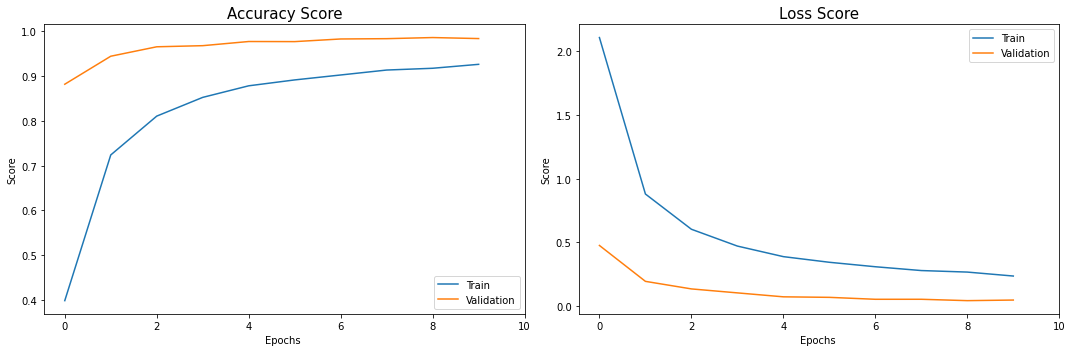

In [68]:
history_graph(h, 10)

In [69]:
score = model.evaluate(X_test, y_test, verbose = 0)

#Loss :  0.16203969717025757
#Accuracy :  0.9528107643127441

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.13297805190086365
Accuracy :  0.9608867764472961


--

In [70]:
def Rebuild_leNet_model_v1():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [71]:
model = Rebuild_leNet_model_v1()

In [72]:
h = model.fit_generator(datagen.flow(X_train,y_train , batch_size = 50), steps_per_epoch = X_train.shape[0]/50, epochs = 10, validation_data = (X_val, y_val), shuffle = 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
695/695 [==============================] - 29s 40ms/step - loss: 1.7589 - accuracy: 0.5009 - val_loss: 0.3788 - val_accuracy: 0.8771
Epoch 2/10
695/695 [==============================] - 21s 30ms/step - loss: 0.5645 - accuracy: 0.8264 - val_loss: 0.1127 - val_accuracy: 0.9644
Epoch 3/10
695/695 [==============================] - 20s 29ms/step - loss: 0.3596 - accuracy: 0.8874 - val_loss: 0.0759 - val_accuracy: 0.9762
Epoch 4/10
695/695 [==============================] - 21s 30ms/step - loss: 0.2726 - accuracy: 0.9144 - val_loss: 0.0643 - val_accuracy: 0.9794
Epoch 5/10
695/695 [==============================] - 21s 30ms/step - loss: 0.2258 - accuracy: 0.9295 - val_loss: 0.0679 - val_accuracy: 0.9785
Epoch 6/10
695/695 [==============================] - 21s 30ms/step - loss: 0.1924 - accuracy: 0.9400 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 7/10
695/695 [==============================] - 20s 29ms/step - loss: 0.1761 - accuracy: 0.9466 - val_loss: 0.0600 - val_accuracy:

In [75]:
score = model.evaluate(X_test, y_test, verbose = 0)

#Loss :  0.13297805190086365
#Accuracy :  0.9608867764472961

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.13596679270267487
Accuracy :  0.963341236114502


Prediction :  1


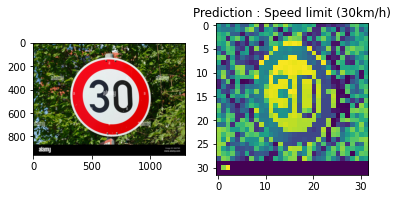

Prediction :  38


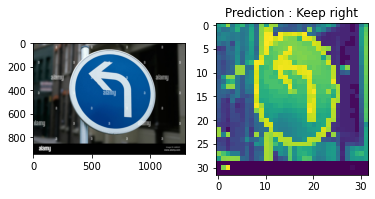

Prediction :  29


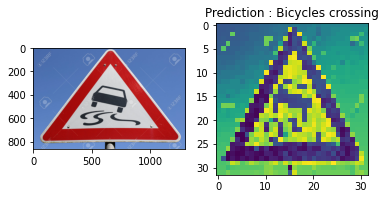

Prediction :  13


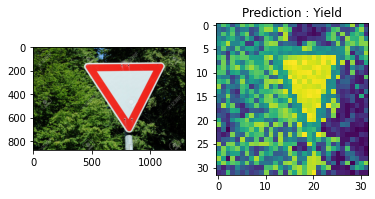

Prediction :  29


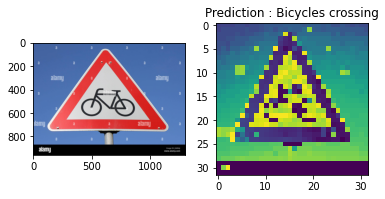

Prediction :  1


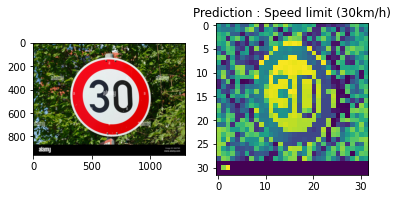

In [76]:
import requests
from PIL import Image

liste = ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg",

"https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg",

"https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg",

"https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg",

"https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg",

"https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg"]

for url in liste:
    r = requests.get(url, stream = True)

    img = Image.open(r.raw)

    plt.subplot(121)
    plt.imshow(img)

    img = np.asarray(img)
    img = cv2.resize(img, (32,32))
    img = preprocessing(img)

    plt.subplot(122)
    plt.imshow(img)

    img = img.reshape((1,32,32,1))

    pred = (np.argmax(model.predict(img)))
    print("Prediction : ", pred)

    name = df[df["ClassId"] == pred]["SignName"].values[0]

    plt.title(f"Prediction : {name}")
    plt.show()